<a href="https://colab.research.google.com/github/khuyentran1401/Applied-Integer-Programming-with-Python/blob/master/Solve_a_project_selection_problem_with_MIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Jimmy plans to invest in several stocks in the coming 3 years, each with a
different expected return for each dollar invested and a specific amount of
investment, as shown in table (all in thousands of dollars). Given that the
amount Jimmy can invest in stock purchases is limited each year, help Jimmy
to decide which stocks to invest in each year so as to maximize the total returns.

In [90]:
pip install mip==1.4.2

In [0]:
from mip.model import *

*   c[i] is the return of each stock 
*   a[t][i] is the investment of each stock for year t
*   b[t] is the total investment limit each year

with i = 0, 1, 2, 3, 4;
> t = 0, 1, 2








In [0]:
c = [90, 120, 100, 80, 130]
b = [45, 60, 50]
a = [[10, 15, 12, 9, 13],
     [20, 15, 25, 15, 10],
     [15, 20, 20, 15, 10]]
T, I = range(len(b)),range(len(c))

In [93]:
a[0][1]

15

Create an empty Mixed Integer Linear Programmning problem. The optimization sense is set to Maximize and the selected sovler is set to Cbc (Coin-or branch and cut)

In [0]:
m = Model(sense = MAXIMIZE,solver_name=CBC)


Create variables with *add_var()* 
Crate a vector of variables with n binary decision variables (n = 5) indicating whether a stock is selected or not. 

In [0]:
names = ['A','B','C','D','E']

In [0]:

x = [[m.add_var(name = names[i], var_type=BINARY) for i in I] for t in T] 

In [97]:
sum(x[t][i] for i in I for t in T)

> Objective is to maximize the total return




> Use *xsum()* for summation expressions



In [0]:
m.objective = maximize(xsum(c[i] * x[t][i] for i in I for t in T))

Add constraint in money available each year

In [0]:
 for t in range(3):
  m += xsum(a[t][i] * x[t][i] for i in I) <= b[t]

> Optimize() method executes the optimization of a formulation. 


> optimize method returns the status (OptimizationStatus) of the search.


> OPTIMAL if the search was concluded and the optimal solution was found.







In [0]:
status = m.optimize()

In [116]:
if status == OptimizationStatus.OPTIMAL:
  print('optimal solution cost {} found'.format(m.objective_value))

optimal solution cost 1170.0 found


In [109]:
results = {}
for i in range(3):
  results[i+1] = [m.vars[j].x for j in range(5*i,5*i+5)]

results

{1: [1.0, 0.0, 1.0, 1.0, 1.0],
 2: [1.0, 1.0, 0.0, 1.0, 1.0],
 3: [0.0, 1.0, 1.0, 0.0, 1.0]}

In [114]:
import pandas as pd

result = pd.DataFrame(data = results, index = ['A','B','C','D','E'])

result

,1,2,3
A,1.0,1.0,0.0
B,0.0,1.0,1.0
C,1.0,0.0,1.0
D,1.0,1.0,0.0
E,1.0,1.0,1.0


Visualize the result

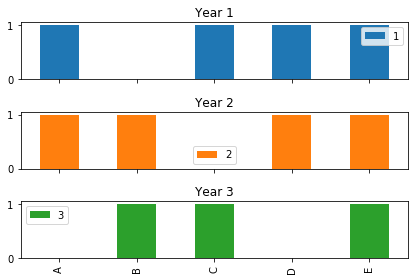

In [126]:
import matplotlib.pyplot as plt

result.plot(kind='bar', subplots = True, title = ['Year 1', 'Year 2', 'Year 3'])
plt.tight_layout()